In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [3]:
def f1(x, y):
    return np.sin(x + 1) - y - 1.2

def f2(x, y):
    return 2*x + np.cos(y) - 2

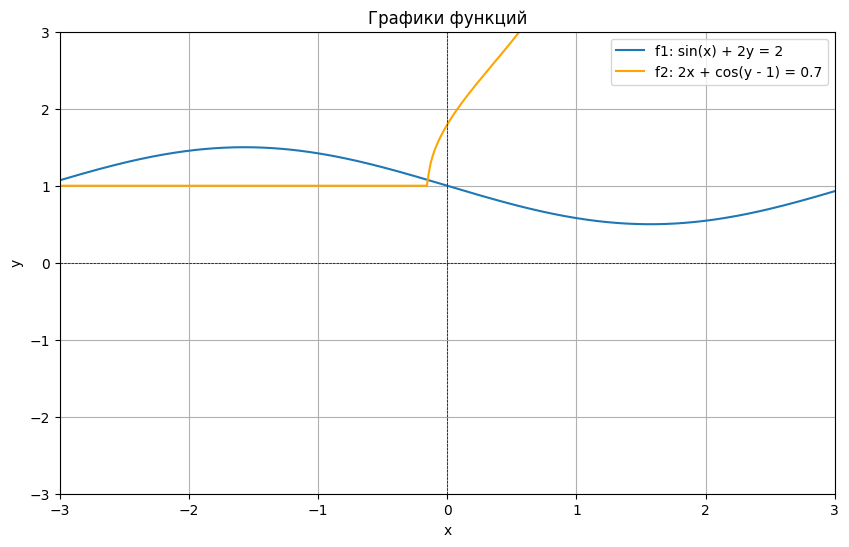

In [4]:
def plot_functions():
    x = np.linspace(-3, 3, 400)
    y1 = (2 - np.sin(x)) / 2
    
    arg = 0.7 - 2*x
    arg = np.clip(arg, -1, 1)
    y2 = 1 + np.arccos(arg)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='f1: sin(x) + 2y = 2')
    plt.plot(x, y2, label='f2: 2x + cos(y - 1) = 0.7', color='orange')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title('Графики функций')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()
plot_functions()

Начальное приближение (x0, y0) = (0, 1)

In [5]:
def jacobian(x, y):
    J11 = np.cos(x)
    J12 = 2
    J21 = 2
    J22 = -np.sin(y - 1)
    return np.array([[J11, J12], [J21, J22]])
print("Матрица Якоби:")
jacobian(0, 1)

Матрица Якоби:


array([[ 1.,  2.],
       [ 2., -0.]])

In [6]:
def get_linear_system(x, y):
    F1 = f1(x, y)
    F2 = f2(x, y)

    J = jacobian(x, y)
    
    print("Система линейных уравнений:")
    print(f"  {J[0,0]}*dx + {J[0,1]}*dy = {-F1}")
    print(f"  {J[1,0]}*dx + {J[1,1]}*dy = {-F2}")

    return J
get_linear_system(0, 1)

Система линейных уравнений:
  1.0*dx + 2.0*dy = -0.0
  2.0*dx + -0.0*dy = -0.30000000000000004


array([[ 1.,  2.],
       [ 2., -0.]])

In [7]:
def cramer_method(x_val, y_val):
    x, y = sympy.symbols('x y')

    f1 = sympy.sin(x) + 2*y - 2
    f2 = 2*x + sympy.cos(y - 1) - 0.7

    df1_dx = f1.diff(x)
    df1_dy = f1.diff(y)
    df2_dx = f2.diff(x)
    df2_dy = f2.diff(y)

    J = sympy.Matrix([[df1_dx, df1_dy], [df2_dx, df2_dy]])

    F = sympy.Matrix([f1.subs({x: x_val, y: y_val}), f2.subs({x: x_val, y: y_val})])

    J_eval = J.subs({x: x_val, y: y_val}).evalf()
    F_eval = F.subs({x: x_val, y: y_val}).evalf()

    if J_eval.det() == 0:
        raise ValueError("Детерминант матрицы Якоби равен нулю. Система не имеет уникального решения.")

    delta = J_eval.inv() * -F_eval
    return delta

result = cramer_method(0, 1)
print(f"Решение при x = 0, y = 1: delta_x = {result[0]}, delta_y = {result[1]}")

Решение при x = 0, y = 1: delta_x = -0.150000000000000, delta_y = 0.0750000000000000


In [8]:
def iter_method(initial_x, initial_y, epsilon=0.001, max_iterations=100):
    x_current, y_current = initial_x, initial_y
    iterations = 0

    while iterations < max_iterations:
        delta = cramer_method(x_current, y_current)

        # Обновление значений
        x_next = x_current + delta[0]
        y_next = y_current + delta[1]

        if sympy.sqrt((x_next - x_current)**2 + (y_next - y_current)**2) < epsilon:
            break

        x_current, y_current = x_next, y_next
        iterations += 1

    return x_next, y_next, iterations

initial_x = 0
initial_y = 1
result_x, result_y, num_iterations = iter_method(initial_x, initial_y)

print(f"Решение: x = {result_x}, y = {result_y}")
print(f"Количество итераций: {num_iterations}")

Решение: x = -0.148630081626301, y = 1.07404172850337
Количество итераций: 2


In [9]:
x, y = sympy.symbols('x y')
solution = sympy.nsolve((sympy.sin(x) + 2*y - 2, 2*x + sympy.cos(y - 1) - 0.7), (x, y), (initial_x, initial_y))
print(f"Решение с использованием sympy.nsolve: x = {solution[0]}, y = {solution[1]}")

Решение с использованием sympy.nsolve: x = -0.148630081626293, y = 1.07404172850337
